# Lab 7: Dimensionality Reduction

In this assignment, we will learn two unsupervised learning methods: Spectral Clustering and Principal Components Analysis

## Example 1: Spectral Clustering

In this example, we synthesize a toy dataset, which has two clusters. Then, we use K-means, Agglomerative, and Spectral clustering method to partition this dataset, respectively. 

For spectral clustering method, we use two methods to construct the similarity graph. The first one is to use the K-nearest neighbor graph method, where we set $K=1$ in this example. The second method is to use the fully connected graph method, where we use the  Gaussian (aka RBF) kernel method measure the simialrity between two samples. 

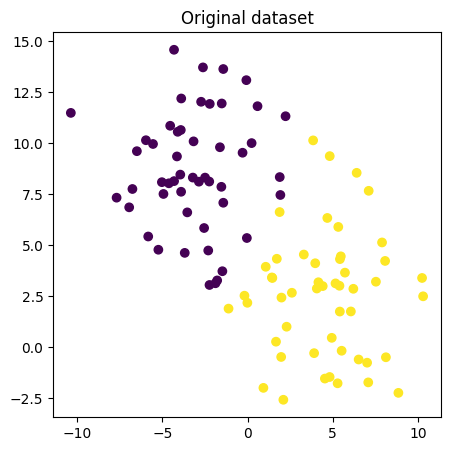

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

/home/parth/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


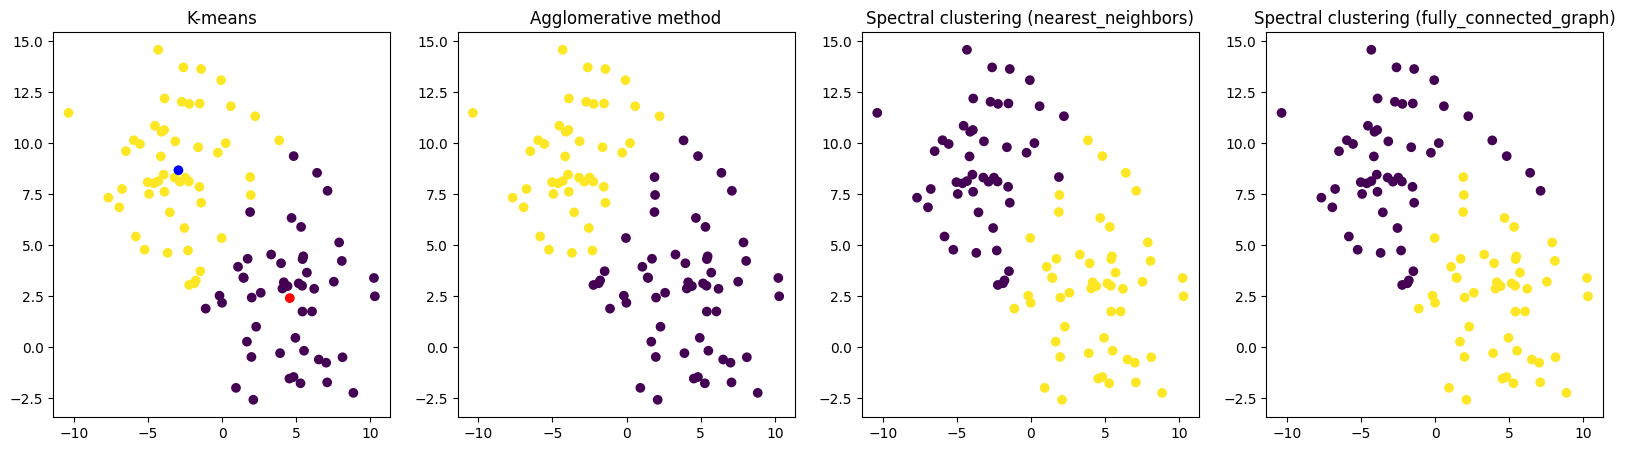

In [2]:
# partition the dataset with K-means
cluster_kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

# partition the dataset with Agglomerative method
cluster_agg = AgglomerativeClustering(n_clusters=2).fit(X)

# partition the dataset with spectral clustering, here we use the 'nearest_neighbors' method to construct the similarity graph
cluster_sp_nn = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='nearest_neighbors', random_state=0).fit(X)

# partition the dataset with spectral clustering, here we use the 'fully connected graph' method to construct the similarity graph
cluster_sp_rbf = SpectralClustering(n_clusters=2, assign_labels="discretize", affinity='rbf', random_state=0).fit(X)


plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_kmeans.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('K-means')

plt.subplot(1,4,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_agg.labels_)
plt.title('Agglomerative method')

plt.subplot(1,4,3)
plt.scatter(X[:, 0], X[:, 1], c=cluster_sp_nn.labels_)
plt.title('Spectral clustering (nearest_neighbors)')

plt.subplot(1,4,4)
plt.scatter(X[:, 0], X[:, 1], c=cluster_sp_rbf.labels_)
plt.title('Spectral clustering (fully_connected_graph)')

plt.show()

Here, we evaluate the performance of these clustering methods with [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 

In [3]:
from sklearn.metrics.cluster import normalized_mutual_info_score


nmi_kmeans = normalized_mutual_info_score(cluster_kmeans.labels_, y, average_method='arithmetic')
nmi_agg = normalized_mutual_info_score(cluster_agg.labels_, y, average_method='arithmetic')
nmi_sp_nn = normalized_mutual_info_score(cluster_sp_nn.labels_, y, average_method='arithmetic')
nmi_sp_rbf = normalized_mutual_info_score(cluster_sp_rbf.labels_, y, average_method='arithmetic')


print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi_kmeans))
print('The normalized mutual information score of the Agglomerative method is {:.4f}'.format(nmi_agg))
print('The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is {:.4f}'.format(nmi_sp_nn))
print('The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is {:.4f}'.format(nmi_sp_rbf))

The normalized mutual information score of the K-means method is 0.9291
The normalized mutual information score of the Agglomerative method is 0.6987
The normalized mutual information score of the Spectral Clustering (nearest_neighbors) method is 0.8782
The normalized mutual information score of the Spectral Clustering (fully_connected_graph) method is 0.6350


## Task 1: Spectral clustering for heart disease dataset

In this task, we use the [heart disease](heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect




**The task is to partition all users into two groups with Spectral Clustering method.**

Then, please compare its performance with the performance of K-means and Agglomerative methods that you obtained in Lab Assignment 6.

### 1.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


Shape of the Data set:  (303, 14)
Num. Categorical Features: 0
Num. Missing: 0


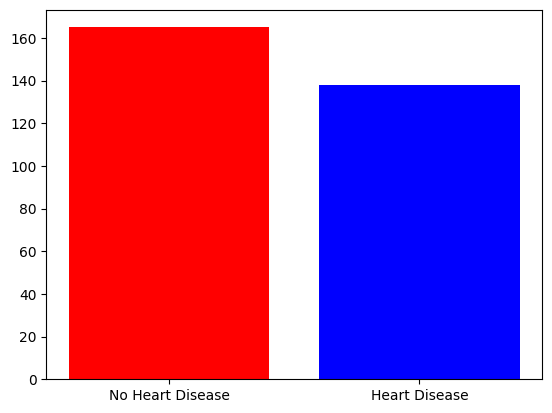

Shape of clustering data: (303, 13)
Valid Cluster Categories: 2


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler

# --- Inspecting Dataset --------------------------------------------------

heart = pd.read_csv("./heart.csv")

categorical_features = heart.select_dtypes(include=['object']).columns
num_missing = heart.isna().sum()

print('Shape of the Data set: ', heart.shape)
print(f"Num. Categorical Features: {categorical_features.size}\nNum. Missing: {num_missing.sum()}")

ground_truth = Counter(heart['target'])
heart_dataset_labels = ["No Heart Disease", "Heart Disease"]
plt.bar([0, 1], ground_truth.values(), color=['red', 'blue'], tick_label=heart_dataset_labels)

plt.show()

# --- Split ---------------------------------------------------------
# truth value
y = heart['target'].values
# drop INPLACE
heart.drop(labels=['target'], inplace=True, axis=1)
X = heart.values

# DISP dataset info

NUM_CLUSTERS = np.unique(y).size

print(f"Shape of clustering data: {X.shape}")
print(f"Valid Cluster Categories: {NUM_CLUSTERS}")

### 1.2 Partition the dataset with Spectral Clustering and compute its NMI
Please use K-nearest neighbor graph method and fully connected graph method to build the similarity graph, respectively. Compare their clustering performance by visualization and computing NMI. 

In [5]:
# --- Lab 6 Data ----------------------------------------------
# ------- K means
km_cluster = cluster = KMeans(n_clusters=NUM_CLUSTERS, random_state=0, n_init='auto').fit(X)

# ext learned data
km_centroids = cluster.cluster_centers_  #get the clustering centroids
km_pred = km_cluster.labels_

km_nmi = normalized_mutual_info_score(y, km_pred)

print(f"Normalized Mutual Information Score from K-means: {km_nmi}")

# ------- Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=NUM_CLUSTERS, metric='euclidean').fit(X)

# ext learned data
agg_pred = agg_cluster.labels_
agg_nmi = normalized_mutual_info_score(y, agg_pred)

print(f"Normalized Mutual Information Score from Agglomerative method: {agg_nmi}")

# --- SC [NEW]   ----------------------------------------------
sc_km_clustering = SpectralClustering(n_clusters=NUM_CLUSTERS, 
                                      random_state=42, 
                                      n_init=10, 
                                      affinity='nearest_neighbors',
                                      assign_labels="discretize").fit(X)

sc_km_pred = sc_km_clustering.labels_
sc_km_nmi = normalized_mutual_info_score(y, sc_km_pred)

print(f'Normalized Mutual Information Score from Spectral Clustering[Nearest-Neighbors]: {sc_km_nmi}')

Normalized Mutual Information Score from K-means: 0.012531811791832022
Normalized Mutual Information Score from Agglomerative method: 0.01106351543636203
Normalized Mutual Information Score from Spectral Clustering[Nearest-Neighbors]: 0.020902255359952937


## Example 2: Principal Component Analysis

In this example, we will show how to use PCA to reduce the dimensionality of the dataset. 

Here, we use the [iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). It is a classification dataset. Each sample has 4 features. In this example, we will use PCA to reduce the number of features from 4 to 2, and then visualize this new dataset in 2D space. 

number of original features: 4
number of new features: 2


Text(0.5, 1.0, 'PCA of IRIS dataset')

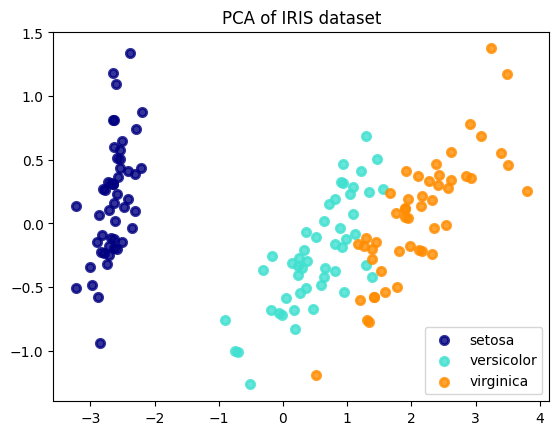

In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

# load dataset, which has 3 classes
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

print('number of original features: {}'.format(X.shape[1]))

#centering the data
X -= np.mean(X, axis = 0)  

# pca, reduce the number of features from 4 to 2
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('number of new features: {}'.format(X_r.shape[1]))


# visualization
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

In the following, we will apply Kmeans method to this dataset. In particular, we will apply Kmeans to the original data and the dimensionality-reduced data. 

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score


# partition the original dataset with K-means
cluster_original = KMeans(n_clusters=2, random_state=0).fit(X)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

# partition the dimensionality-reduced dataset with K-means
cluster_pca = KMeans(n_clusters=2, random_state=0).fit(X_r)
centroids = cluster_kmeans.cluster_centers_  #get the clustering centroids

#evaluate the clustering performance
nmi_original = normalized_mutual_info_score(cluster_original.labels_, y, average_method='arithmetic')
nmi_pca = normalized_mutual_info_score(cluster_pca.labels_, y, average_method='arithmetic')

print('The normalized mutual information score of the original dataset is {:.4f}'.format(nmi_original))
print('The normalized mutual information score of the dimensionality-reduced dataset is {:.4f}'.format(nmi_pca))


The normalized mutual information score of the original dataset is 0.6565
The normalized mutual information score of the dimensionality-reduced dataset is 0.6565


/home/parth/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/parth/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


From the clustering performance, we can see that they have almost the same clustering performance, which means that PCA keeps almost all the information in the original data. 

## Task 2: PCA for  heart disease dataset

In this experiment, we still use the [heart disease](heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

This dataset has a lot of features. In this experiment, we will use PCA method to reduce the dimensionality of the original data, and then we apply the Logistic regression model to the dimensionality-reduced data to do classification. 

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features
* $\color{red}{Centering\ the\ data}$


Shape of the Data set:  (303, 14)
Num. Categorical Features: 0
Num. Missing: 0


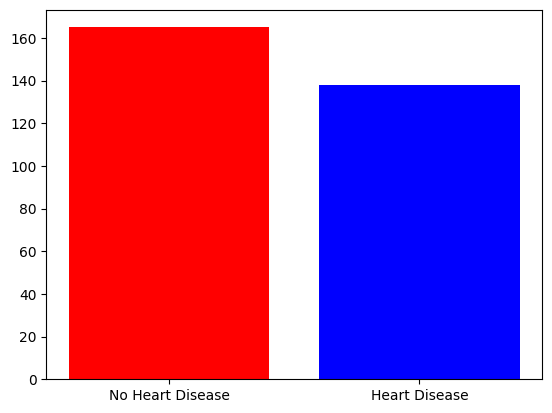

Shape of clustering data: (303, 13)
Valid Cluster Categories: 2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler

# --- Inspecting Dataset --------------------------------------------------

heart = pd.read_csv("./heart.csv")

categorical_features = heart.select_dtypes(include=['object']).columns
num_missing = heart.isna().sum()

print('Shape of the Data set: ', heart.shape)
print(f"Num. Categorical Features: {categorical_features.size}\nNum. Missing: {num_missing.sum()}")

ground_truth = Counter(heart['target'])
heart_dataset_labels = ["No Heart Disease", "Heart Disease"]
plt.bar([0, 1], ground_truth.values(), color=['red', 'blue'], tick_label=heart_dataset_labels)

plt.show()

# --- Split ---------------------------------------------------------
# truth value
y = heart['target'].values
# drop INPLACE
heart.drop(labels=['target'], inplace=True, axis=1)
X = heart.values

NUM_CLUSTERS = np.unique(y).size

print(f"Shape of clustering data: {X.shape}")
print(f"Valid Cluster Categories: {NUM_CLUSTERS}")

# Centering the data
X -= np.mean(X, axis=0)

### 2.2 Use PCA to do dimensionality reduction for visualization

* Please reduce the number of features to 2 and visualize this dataset by following the given example.


Num of features reduced from 13 to 2


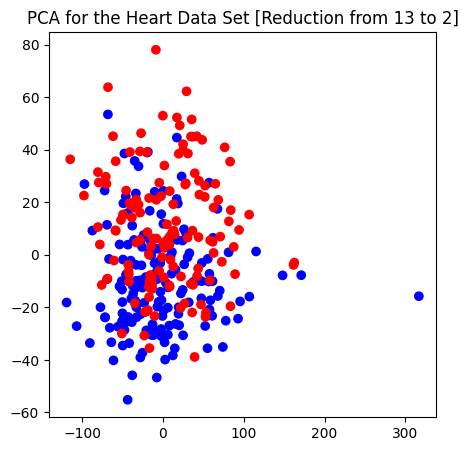

In [9]:
X_reduced_2_pca = PCA(n_components=2).fit(X)
X_reduced_2 = X_reduced_2_pca.transform(X)
print(f"Num of features reduced from {X.shape[1]} to {X_reduced_2.shape[1]}")


# plotting routine
coloring = np.where(y == 0, 'red', 'blue')

plt.figure(figsize=(5,5))
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=coloring)
plt.title(f'PCA for the Heart Data Set [Reduction from {X.shape[1]} to {X_reduced_2.shape[1]}]')
plt.show()

### 2.3 Use PCA to do dimensionality reduction and then conduct classification

* Please reduce the number of features to different values (e.g. 2, 5, 10)
* Then, please run logistic regression model with the dimensionality-reduced data.
* Compare the classification performance (e.g. accuracy, F1-score) when using different number of features(e.g. 2, 5, 10). 


In [10]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression

PCA_comp_n = [2, 5, 7, 10, 12]

PCA_data = pd.DataFrame()

for num_comps in PCA_comp_n:
    X_reduced = PCA(n_components=num_comps).fit_transform(X)
    LR_model = LogisticRegression(random_state=42, max_iter=3000).fit(X_reduced, y)
    
    y_pred = LR_model.predict(X_reduced)
    
    acc = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    print(f'Num Components: {num_comps}')
    print(f'acc={acc}')
    print(f'recall={recall}')
    print(f'precision={precision}')
    print(f'f1: {f1}', end="\n\n")

Num Components: 2
acc=0.7062706270627063
recall=0.7818181818181819
precision=0.7087912087912088
f1: 0.7435158501440922

Num Components: 5
acc=0.8118811881188119
recall=0.8787878787878788
precision=0.7967032967032966
f1: 0.8357348703170029

Num Components: 7
acc=0.8184818481848185
recall=0.8727272727272727
precision=0.8089887640449438
f1: 0.8396501457725947

Num Components: 10
acc=0.858085808580858
recall=0.9333333333333333
precision=0.8279569892473119
f1: 0.8774928774928776

Num Components: 12
acc=0.8415841584158416
recall=0.9151515151515152
precision=0.8162162162162162
f1: 0.8628571428571429

